In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import seaborn as sns

## Top Industri

In [3]:
df = pd.read_csv("top_industry.csv")

In [4]:
df_m = pd.melt(df, id_vars=['DISIC5'])
df_m['tahun'] = df_m['variable'].str[-4:].astype('int')
df_m.drop('variable', axis=1, inplace=True)


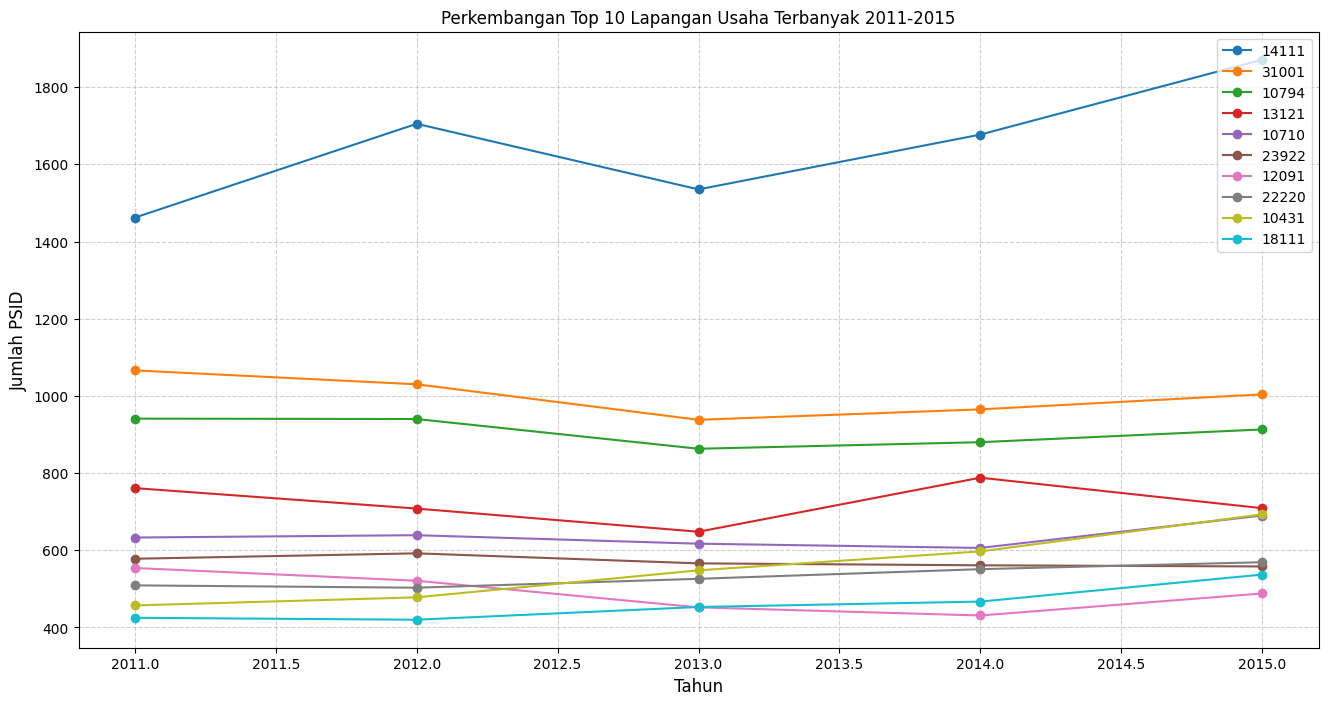

In [5]:
colors = [
    'tab:blue',    # Biru
    'tab:orange',  # Oranye
    'tab:green',   # Hijau
    'tab:red',     # Merah
    'tab:purple',  # Ungu
    'tab:brown',   # Cokelat
    'tab:pink',    # Merah muda
    'tab:gray',    # Abu-abu
    'tab:olive',   # Hijau zaitun
    'tab:cyan'     # Sian
]
j = 0
plt.figure(figsize=(16, 8))
for i in df['DISIC5']:
    data = df_m[df_m['DISIC5']==i]
    plt.plot(data['tahun'], data['value'], label=i, color=colors[j], marker="o")
    j+= 1
plt.title("Perkembangan Top 10 Lapangan Usaha Terbanyak 2011-2015")
plt.ylabel("Jumlah PSID", fontsize=12)
plt.xlabel("Tahun", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("plot_top_industry.png")


## Deviasi Perusahaan keluar masuk

In [8]:
df_konveksi = df_m[df_m['DISIC5']==14111]

In [9]:
df_konveksi['deviasi'] = df_konveksi['value'] - 1403

C:\Users\Pongo\AppData\Local\Temp\ipykernel_27000\1798470905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konveksi['deviasi'] = df_konveksi['value'] - 1403


In [24]:
np.mean(df_konveksi['deviasi'])

247.0

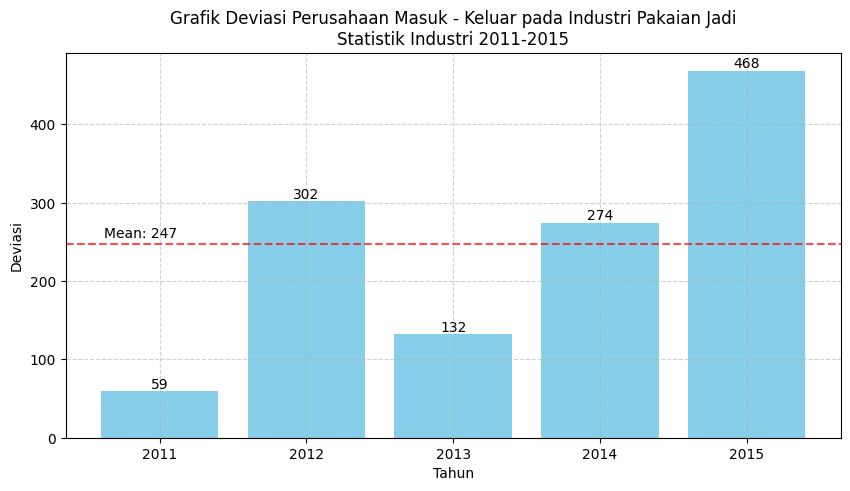

In [57]:
# plot deviasi 
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(df_konveksi['tahun'], df_konveksi['deviasi'], color='skyblue')
ax.bar_label(bars, fmt='%.0f')
ax.set_title("Grafik Deviasi Perusahaan Masuk - Keluar pada Industri Pakaian Jadi\nStatistik Industri 2011-2015")
ax.set_xlabel("Tahun")
ax.set_ylabel("Deviasi")
mean_val = 247
ax.axhline(y=mean_val, linestyle="--", color="red", alpha=0.7)  # Highlight Mean
ax.text(0.05, 0.52, f'Mean: {mean_val}', transform=ax.transAxes)
ax.grid(True, linestyle="--", alpha=0.6)

plt.savefig("plot_deviasi.png")
plt.show()

## Eklorasi Data Analysis 

In [259]:
# load dataset 
df_e = pd.read_csv('eksplorasi_pre.csv')

In [260]:
# pemilihan variabel 
df_e = df_e[['PSID', 'year','DPROVI','DKABUP','V1101','V1103','V1106','V1109','V1112','V1115','CBNECU','CMNECU','CVNECU','CONECU','CTNECU','y','CAPITAL','MATERIAL','va','l','k','m','i']]

In [261]:
print("Jumlah data sebanyak: ", len(df_e))
print("Fitur yang dipilih sebanyak: ", len(df_e.columns))

Jumlah data sebanyak:  8250
Fitur yang dipilih sebanyak:  23


In [262]:
#contoh data
df_e.head(15)

,PSID,year,DPROVI,DKABUP,V1101,V1103,V1106,V1109,V1112,V1115,...,CONECU,CTNECU,y,CAPITAL,MATERIAL,va,l,k,m,i
0,2618,2011,12,6.0,1500000.0,100000.0,115000.0,40000.0,0.0,1755000.0,...,NaN,NaN,14.198771,16637.7520,986813.00,12.580614,2.995732,9.305651,13.834270,NaN
1,2618,2012,12,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,14.315362,0.0000,1108397.10,12.715335,3.218876,10.085809,13.993554,NaN
2,2618,2013,12,6.0,350000.0,500000.0,300000.0,40000.0,0.0,1190000.0,...,NaN,NaN,14.493819,9949.8330,1055433.50,13.089548,3.258097,10.316590,13.953905,9.205311
3,2620,2011,12,6.0,850000.0,250000.0,125000.0,40000.0,0.0,1265000.0,...,NaN,NaN,14.254860,11992.4530,821242.50,13.024022,3.044522,9.332558,13.665740,NaN
4,2620,2012,12,6.0,900000.0,200000.0,120000.0,35000.0,0.0,1255000.0,...,NaN,NaN,14.107156,11396.4510,778939.56,12.858067,3.135494,9.392662,13.615333,NaN
5,2620,2013,12,6.0,950000.0,200000.0,150000.0,50000.0,10000.0,1360000.0,...,NaN,NaN,14.237397,11371.2370,652218.19,13.183608,3.091042,10.308952,13.458618,NaN
6,2623,2011,12,6.0,584100.0,102000.0,112000.0,50000.0,5000.0,853100.0,...,NaN,NaN,14.198771,8087.5591,1032243.60,12.411449,2.995732,9.680344,13.898360,NaN
7,2623,2012,12,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,14.146377,0.0000,934461.25,12.603686,2.995732,9.680344,13.802378,NaN
8,2623,2013,12,6.0,585000.0,110000.0,112500.0,52000.0,5600.0,865100.0,...,NaN,NaN,14.319769,7233.2778,964965.38,12.802039,3.091042,9.564512,13.832726,8.886448
9,2624,2011,12,6.0,210000.0,50000.0,45000.0,50000.0,0.0,355000.0,...,NaN,NaN,14.064506,3365.4712,773437.94,12.623516,3.218876,9.637763,13.613972,NaN


#### Pengecekan Duplikasi

In [263]:
df_e.duplicated().sum()

0

#### Pengecekan Missing Value

In [264]:
df_e.isnull().sum()

PSID           0
year           0
DPROVI         0
DKABUP         1
V1101        705
V1103        705
V1106        705
V1109        705
V1112        705
V1115        705
CBNECU      8250
CMNECU      8250
CVNECU      8250
CONECU      8250
CTNECU      8250
y              0
CAPITAL      705
MATERIAL       0
va             0
l              0
k            249
m              4
i           5354
dtype: int64

##### Handling Missing Value m (Faktor Produksi Antara)

In [265]:
# pengecekan missing value material pertahun
df_e[df_e['m'].isnull()].groupby('year').count()['PSID']

year
2015    4
Name: PSID, dtype: int64

In [266]:
# lihat secara detail
psid_m_missing = list(df_e[df_e['m'].isnull()]["PSID"])
df_e[df_e['PSID'].isin(psid_m_missing)][["PSID", "year", "m"]]

,PSID,year,m
423,13219,2011,15.083395
424,13219,2012,13.342792
425,13219,2013,14.101855
426,13219,2014,7.907428
427,13219,2015,NaN
2361,46899,2011,14.884062
2362,46899,2012,11.156406
2363,46899,2013,16.631577
2364,46899,2014,13.761259
2365,46899,2015,NaN


In [267]:
# handling missing value m, strategi mengisinya dengan data 2014, karena posisinya di 2015 maka dapat langsung menggunaka forward interpolation
df_e["m"] = df_e["m"] .interpolate(method='pad', limit_direction="forward")

In [268]:
# cek lagi
df_e[df_e['PSID'].isin(psid_m_missing)][["PSID", "year", "m"]]

,PSID,year,m
423,13219,2011,15.083395
424,13219,2012,13.342792
425,13219,2013,14.101855
426,13219,2014,7.907428
427,13219,2015,7.907428
2361,46899,2011,14.884062
2362,46899,2012,11.156406
2363,46899,2013,16.631577
2364,46899,2014,13.761259
2365,46899,2015,13.761259


##### Handling Missing Value k (faktor modal)

In [269]:
# pengecekan faktor k pertahun
df_e[df_e['k'].isnull()].groupby('year').count()['PSID']

year
2011    36
2012    55
2013    44
2014    51
2015    63
Name: PSID, dtype: int64

In [270]:
# lihat secara detail
psid_k_missing = list(df_e[df_e['k'].isnull()]["PSID"])
df_e[df_e['PSID'].isin(psid_k_missing)][["PSID", "year", "k"]]

,PSID,year,k
27,6167,2012,NaN
28,6167,2014,8.766238
288,7688,2011,10.819778
289,7688,2012,12.944143
290,7688,2013,NaN
...,...,...,...
7890,75410,2014,14.430571
7891,75410,2015,NaN
8032,75636,2014,NaN
8134,76723,2015,NaN


In [271]:
# disini untuk yang 2012 keatas dapat diisi dengan forward interpolation, namun belum tentu juga tahun sebelumnya itu tidak missing 
df_e.loc[df_e['k'].isnull() & df_e['year'].isin([2012, 2013, 2014, 2015]), 'k'] = df_e['k'].interpolate(method='pad', limit_direction='forward')

In [272]:
# pengecekan faktor k pertahun setelah interpolasi
df_e[df_e['k'].isnull()].groupby('year').count()['PSID']

year
2011    36
Name: PSID, dtype: int64

In [273]:
# karena data yang missing ditahun 2012 ternyata di 2011 tidak missing, sehingga untuk 2011 akan kita interpolasi dengan backward
df_e["k"] = df_e["k"] .interpolate(method='linear', limit_direction="backward", limit=1)

##### Handling Missing Value i (Investasi)

In [274]:
df_e['i'].isnull().sum()

5354

In [275]:
# pengecekan missing value faktor i pertahun
df_e[df_e['i'].isnull()].groupby('year').count()['PSID']

year
2011    1462
2012    1120
2013     966
2014    1145
2015     661
Name: PSID, dtype: int64

In [276]:
# lihat secara detail
psid_i_missing = list(df_e[df_e['i'].isnull()]["PSID"])
df_e[df_e['PSID'].isin(psid_i_missing)][["PSID", "year", "i"]]

,PSID,year,i
0,2618,2011,NaN
1,2618,2012,NaN
2,2618,2013,9.205311
3,2620,2011,NaN
4,2620,2012,NaN
...,...,...,...
8245,77729,2015,NaN
8246,77730,2015,NaN
8247,77731,2015,NaN
8248,77732,2015,NaN


disini missing value pada fitur i tinggi sekali sebesar 5354 dari 8250 data yang tersedia. Sehingga data missing mencapai 63,44%. Karena tingginya missing, imputasi harus dilakukan secara hati-hati. Dikarenakan i didefinisikan sebagai banyak investasi yang tercermin dari perubahan modal perusahaan dari tahun x ke tahun x+1. Dengan demikian, imputasi missing value yang lebih tepat dalam kasus ini adalah mengisinya dengan 0 dianggap perusahaan tidak melakukan investasi pada tahun tersebut. 

In [277]:
df_e.loc[df_e['i'].isnull(), 'i'] = 0

In [278]:
df_e[df_e['PSID'].isin(psid_i_missing)][["PSID", "year", "i"]]

,PSID,year,i
0,2618,2011,0.000000
1,2618,2012,0.000000
2,2618,2013,9.205311
3,2620,2011,0.000000
4,2620,2012,0.000000
...,...,...,...
8245,77729,2015,0.000000
8246,77730,2015,0.000000
8247,77731,2015,0.000000
8248,77732,2015,0.000000


##### Handling Missing Value 'V1101','V1103','V1106','V1109','V1112','V1115'

In [279]:
df_e.drop(['V1115'], axis=1, inplace=True)

In [280]:
df_e[df_e['V1101'].isnull() & df_e['V1103'].isnull() & df_e['V1106'].isnull() & df_e['V1109'].isnull() & df_e['V1112'].isnull() & df_e['CAPITAL'].isnull()]

,PSID,year,DPROVI,DKABUP,V1101,V1103,V1106,V1109,V1112,CBNECU,...,CONECU,CTNECU,y,CAPITAL,MATERIAL,va,l,k,m,i
1976,43017,2015,51,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.463512,NaN,64403492.0,17.677979,6.745236,12.538623,18.037918,0.0
2240,45341,2012,32,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.216440,NaN,1104808.3,14.482948,3.828641,10.342903,14.175701,0.0
2241,45341,2013,32,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.945048,NaN,2360174.3,15.095389,3.828641,11.098818,14.934764,0.0
2242,45341,2014,32,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.516493,NaN,2029451.9,14.856627,3.828641,11.060715,14.783794,0.0
2243,45341,2015,32,73.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.546917,NaN,2844235.5,14.761384,3.828641,11.480795,15.121324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,77729,2015,51,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.100302,NaN,6061505.0,15.314769,4.382027,10.175422,15.674708,0.0
8246,77730,2015,51,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.980956,NaN,5379585.5,15.195422,4.262680,10.056080,15.555362,0.0
8247,77731,2015,51,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.922969,NaN,5076510.0,15.137435,4.204693,9.998070,15.497375,0.0
8248,77732,2015,51,71.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.407155,NaN,3030752.5,14.621622,3.688880,9.482274,14.981562,0.0


- terlihat bahwa untuk setiap fitur yang missing dari fitur-fitur tersebut terjadi pada data yang sama. 
- Fitur dengan nama diawali V1 adalah estimasi nilai suatu perusahaan. Sehingga nilainya akan terkait dari satu tahun ke tahun yang lain. 
- Selanjutnya akan dicek tahun apa saja mereka terjadi. 

In [281]:
df_e[df_e['V1101'].isnull() & df_e['V1103'].isnull() & df_e['V1106'].isnull() & df_e['V1109'].isnull() & df_e['V1112'].isnull() & df_e['CAPITAL'].isnull()].groupby('year').count()['PSID']

year
2011     16
2012     93
2013    115
2014    201
2015    280
Name: PSID, dtype: int64

In [282]:
# forward interpolation untuk tahun > 2011
df_e.loc[df_e['V1101'].isnull() & df_e['V1103'].isnull() & df_e['V1106'].isnull() & df_e['V1109'].isnull() & df_e['V1112'].isnull() & df_e['CAPITAL'].isnull() & df_e['year'].isin([2012, 2013, 2014, 2015]), ['V1101','V1103','V1106','V1109','V1112','CAPITAL']] = df_e[['V1101','V1103','V1106','V1109','V1112','CAPITAL']].interpolate(method='linear', limit_direction='forward')

In [283]:
df_e[df_e['V1101'].isnull() & df_e['V1103'].isnull() & df_e['V1106'].isnull() & df_e['V1109'].isnull() & df_e['V1112'].isnull() & df_e['CAPITAL'].isnull()].groupby('year').count()['PSID']

year
2011    16
Name: PSID, dtype: int64

In [285]:
# backward interpolation untuk tahun 2011
df_e.loc[df_e['V1101'].isnull() & df_e['V1103'].isnull() & df_e['V1106'].isnull() & df_e['V1109'].isnull() & df_e['V1112'].isnull() & df_e['CAPITAL'].isnull() & df_e['year'].isin([2011]), ['V1101','V1103','V1106','V1109','V1112','CAPITAL']] = df_e[['V1101','V1103','V1106','V1109','V1112','CAPITAL']].interpolate(method='linear', limit_direction='backward')

##### (Wrapped) Handling Missing Value

In [286]:
# variabel seperti 'CBNECU','CMNECU','CVNECU','CONECU','CTNECU' terlihat sepenuhnya missing sehingga akan di drop
df_e.drop(['CBNECU','CMNECU','CVNECU','CONECU','CTNECU'], axis=1, inplace=True)

In [287]:
df_e.isnull().sum()

PSID        0
year        0
DPROVI      0
DKABUP      1
V1101       0
V1103       0
V1106       0
V1109       0
V1112       0
y           0
CAPITAL     0
MATERIAL    0
va          0
l           0
k           0
m           0
i           0
dtype: int64

#### Pengecekan Outliers

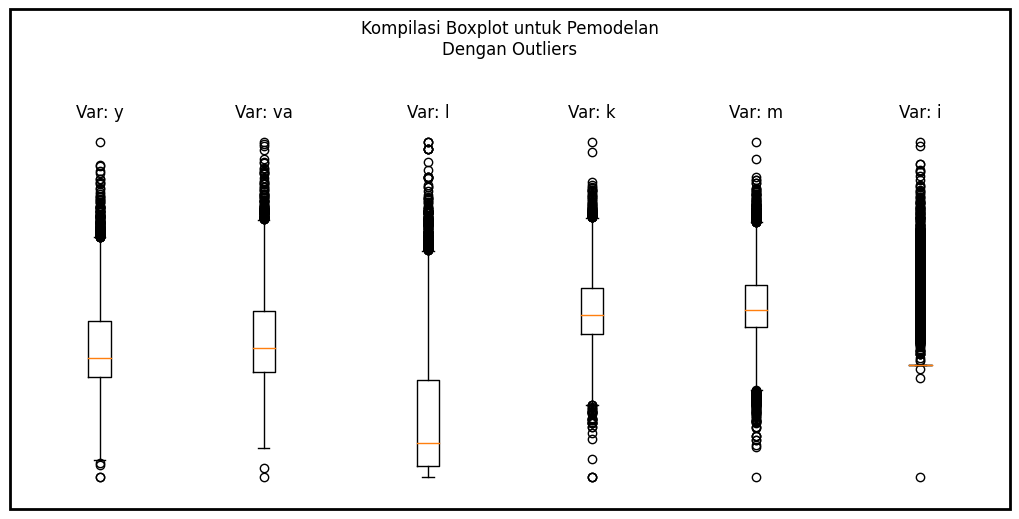

In [288]:
nama_var = ['y', 'va', 'l', 'k', 'm', 'i']

fig = plt.figure(figsize=(10, 5))
plt.suptitle("Kompilasi Boxplot untuk Pemodelan\nDengan Outliers")

rect = patches.Rectangle(
    (0, 0), 1, 1,  # Posisi awal dan ukuran relatif
    transform=fig.transFigure,
    color="black",
    linewidth=2,
    fill=False,
    zorder=10  # Prioritas frame
)
fig.patches.append(rect)

for i in range(6):
    ax = plt.subplot(1, 6, i+1)
    ax.boxplot(df_e[nama_var[i]], vert=True)
    ax.set_title(f"Var: {nama_var[i]}")
    ax.grid(True, linestyle="--", alpha=1)
    ax.axis('off')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    ax.tick_params(left=False, bottom=False)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig("kompilasi_boxplot_with_outliers.png")
plt.show()

#### Analisis Univariate

In [ ]:
df_sum = df_e.groupby(['year']).sum()[['y', 'va', 'l', 'k', 'i']].reset_index()

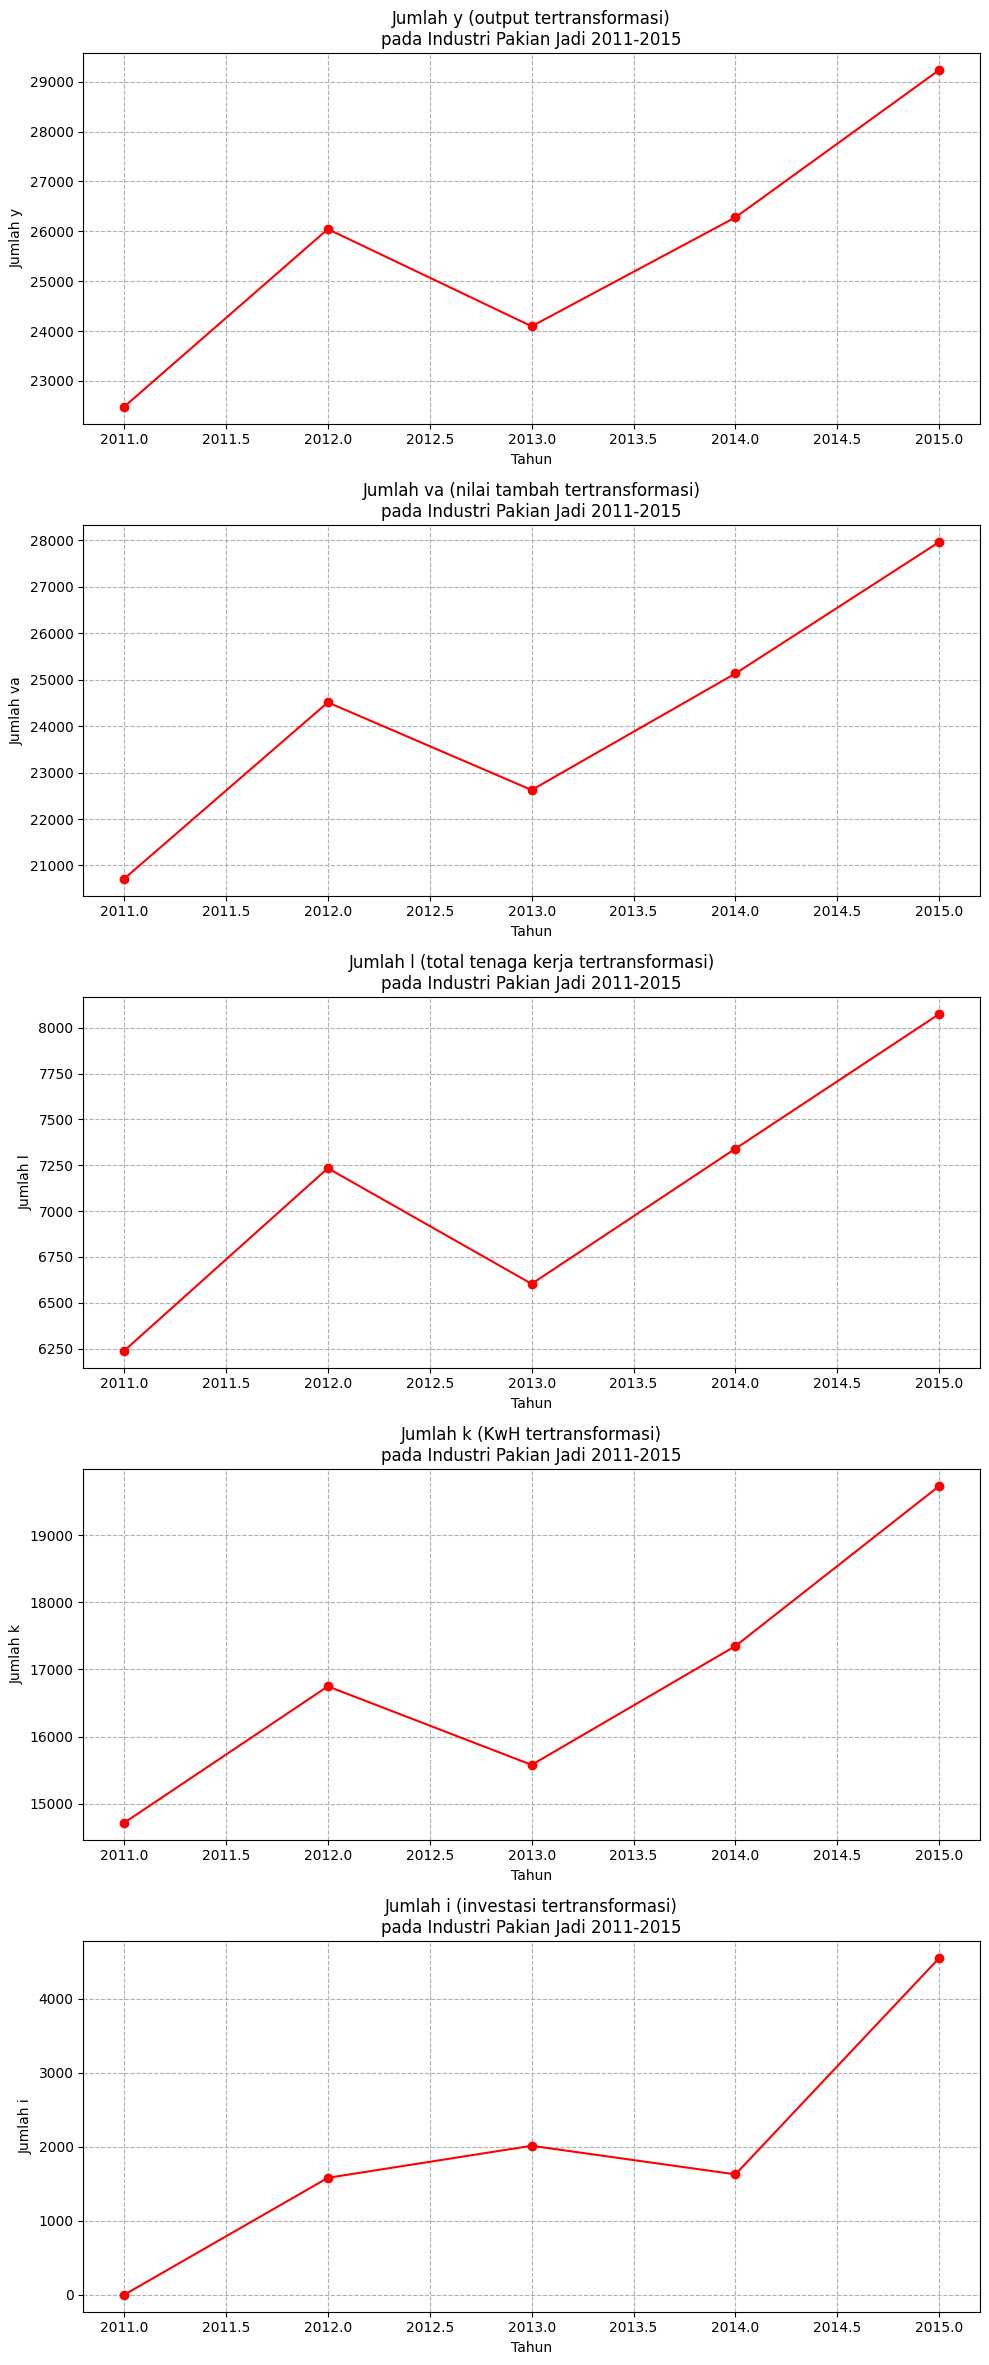

In [ ]:
plt.figure(figsize=(10, 25))
plt.subplot(5, 1, 1)
plt.plot(df_sum['year'], df_sum['y'], marker="o", color='red')
plt.xlabel('Tahun')
plt.ylabel('Jumlah y')
plt.grid(True, linestyle="--")
plt.title("Jumlah y (output tertransformasi)\npada Industri Pakian Jadi 2011-2015")

plt.subplot(5, 1, 2)
plt.plot(df_sum['year'], df_sum['va'], marker="o", color='red')
plt.xlabel('Tahun')
plt.ylabel('Jumlah va')
plt.grid(True, linestyle="--")
plt.title("Jumlah va (nilai tambah tertransformasi)\npada Industri Pakian Jadi 2011-2015")

plt.subplot(5, 1, 3)
plt.plot(df_sum['year'], df_sum['l'], marker="o", color='red')
plt.xlabel('Tahun')
plt.ylabel('Jumlah l')
plt.grid(True, linestyle="--")
plt.title("Jumlah l (total tenaga kerja tertransformasi)\npada Industri Pakian Jadi 2011-2015")

plt.subplot(5, 1, 4)
plt.plot(df_sum['year'], df_sum['k'], marker="o", color='red')
plt.xlabel('Tahun')
plt.ylabel('Jumlah k')
plt.grid(True, linestyle="--")
plt.title("Jumlah k (KwH tertransformasi)\npada Industri Pakian Jadi 2011-2015")

plt.subplot(5, 1, 5)
plt.plot(df_sum['year'], df_sum['i'], marker="o", color='red')
plt.xlabel('Tahun')
plt.ylabel('Jumlah i')
plt.grid(True, linestyle="--")
plt.title("Jumlah i (investasi tertransformasi)\npada Industri Pakian Jadi 2011-2015")

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig('univariate.png')
plt.show()

Analisis univariate dilakukan untuk memahami data-data pada setiap fitur. Bagaimana data tersebar pada fitur-fitur tersebut, sehingga dapat diambil suatu keputusan untuk melakukan transformasi atau melakukan binning pada feature engineering. Pada analisis ini disimpulkan bahwa data pada setiap variabel (y, va, l, k, dan i) memiliki kecenderungan untuk naik. Setiap variabel memiliki kecenderungan untuk jumlah minimum pada 2011 dan titik maksimum pada 2015. Pada variabel y, va, l, dan k mengalami penurunan jumlah yang signifikan pada 2013, kemudian mengalami kenaikan kembali. 

#### Analisis Multivariate

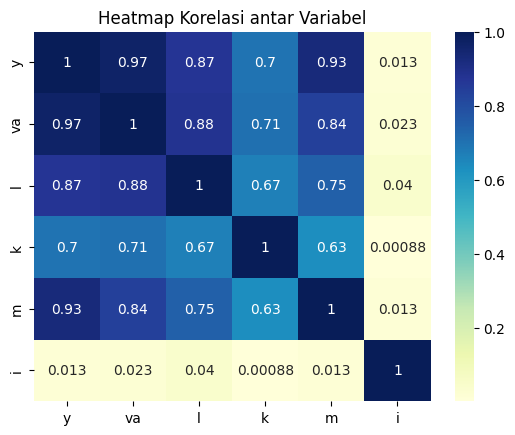

In [289]:
sns.heatmap(df_e[['y', 'va', 'l', 'k', 'm', 'i']].corr(), cmap="YlGnBu", annot=True).set_title("Heatmap Korelasi antar Variabel")
plt.savefig("Heatmap_corr.png")
plt.show()

#### Export 

In [ ]:
df_e.drop(['V1101', 'V1103', 'V1106', 'V1109', 'V1112'], axis=1, inplace=True)

In [295]:
len(df_e.columns)

12

In [293]:
df_e.to_csv('post_eksplorasi.csv', index=False)

## Eksplorasi Pasca Prediksi

In [2]:
# load dataset 
df_f = pd.read_csv("post_prediction.csv")

In [13]:
df_f.columns

Index(['psid', 'year', 'dprovi', 'dkabup', 'y', 'capital', 'material', 'l',
       'k', 'm', 'i', 'residacftrans_va', 'TFPacftrans_va',
       'meanTFPacftrans_va', 'residacfcd_va', 'TFPacfcd_va', 'meanTFPacfcd_va',
       'residacfcd_go', 'TFPacfcd_go', 'meanTFPacfcd_go', 'residacftrans_go',
       'TFPacftrans_go', 'meanTFPacftrans_go', 'va', 'mean_va', 'mean_y',
       'TFPlvACFcd_va', 'TFPlvACFtrans_va', 'meanTFPlvACFcd_va',
       'meanTFPlvACFtrans_va', 'TFPlvACFcd_go', 'TFPlvACFtrans_go',
       'meanTFPlvACFcd_go', 'meanTFPlvACFtrans_go'],
      dtype='object')

In [56]:
df_f["output"] = np.exp(df_f.y)

In [57]:
df_f.output.describe()

count    8.250000e+03
mean     3.905233e+07
std      2.092298e+08
min      4.113469e+04
25%      1.764770e+06
50%      3.656950e+06
75%      1.443405e+07
max      1.221750e+10
Name: output, dtype: float64

In [67]:
from sklearn.preprocessing import MinMaxScaler
coba = df_f.copy()
scaler = MinMaxScaler()
coba["TFPlvACFcd_go_norm"] = scaler.fit_transform(df_f[["TFPlvACFcd_go"]])
coba["output_norm"] = scaler.fit_transform(df_f[["output"]])
coba["TFPlvACFtrans_go_norm"] = scaler.fit_transform(df_f[["TFPlvACFtrans_go"]])

In [90]:
campuran_ln_go = np.concatenate((df_f.TFPacfcd_go, df_f.y, df_f.TFPacftrans_go))
campuran_go = np.concatenate((df_f.TFPlvACFcd_go, df_f.output, df_f.TFPlvACFtrans_go))

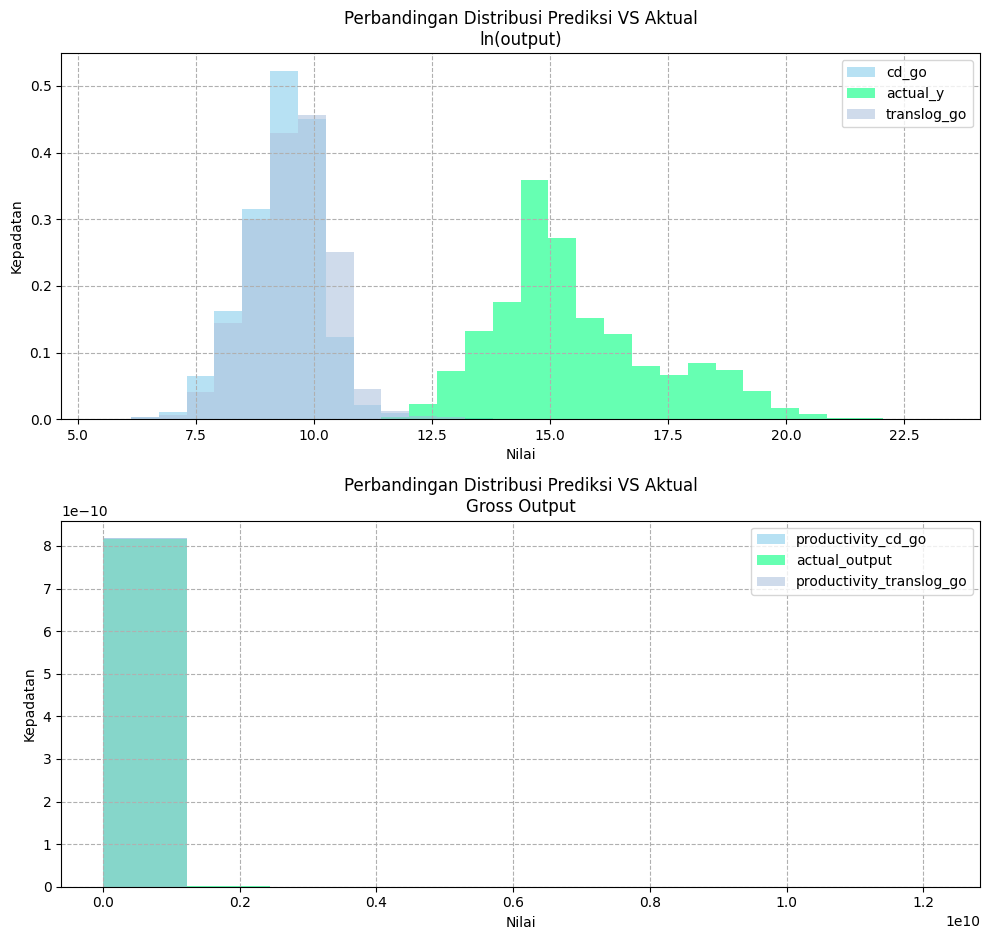

In [91]:
# Membuat data distribusi normal
# Plot histogram
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(df_f.TFPacfcd_go, bins=30, density=True, alpha=0.6, color="#87CEEB", label="cd_go", range=(min(campuran_ln_go), max(campuran_ln_go)))
plt.hist(df_f.y, bins=30, density=True, alpha=0.6, color="#00FF7F", label="actual_y", range=(min(campuran_ln_go), max(campuran_ln_go)))
plt.hist(df_f.TFPacftrans_go, bins=30, density=True, alpha=0.6, color="#B0C4DE", label="translog_go", range=(min(campuran_ln_go), max(campuran_ln_go)))
plt.title("Perbandingan Distribusi Prediksi VS Aktual\nln(output)")
plt.xlabel("Nilai")
plt.ylabel("Kepadatan")
plt.legend()
plt.grid(True, linestyle="--")


plt.subplot(2, 1, 2)
plt.hist(df_f.TFPlvACFcd_go, density=True, alpha=0.6, range=(min(campuran_go), max(campuran_go)), color="#87CEEB", label="productivity_cd_go")
plt.hist(df_f.output, density=True, alpha=0.6, range=(min(campuran_go), max(campuran_go)), color="#00FF7F", label="actual_output")
plt.hist(df_f.TFPlvACFtrans_go, density=True, alpha=0.6, range=(min(campuran_go), max(campuran_go)), color="#B0C4DE", label="productivity_translog_go")
plt.title("Perbandingan Distribusi Prediksi VS Aktual\nGross Output")
plt.xlabel("Nilai")
plt.ylabel("Kepadatan")
plt.legend()
plt.grid(True, linestyle="--")

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig("distribusi_output.png")
plt.show()

In [88]:
df_f['nilai_tambah'] = np.exp(df_f["va"])
campuran_ln_va = np.concatenate((df_f.TFPacfcd_va, df_f.va, df_f.TFPacftrans_va))
campuran_va = np.concatenate((df_f.TFPlvACFcd_va, df_f.nilai_tambah, df_f.TFPlvACFtrans_va))

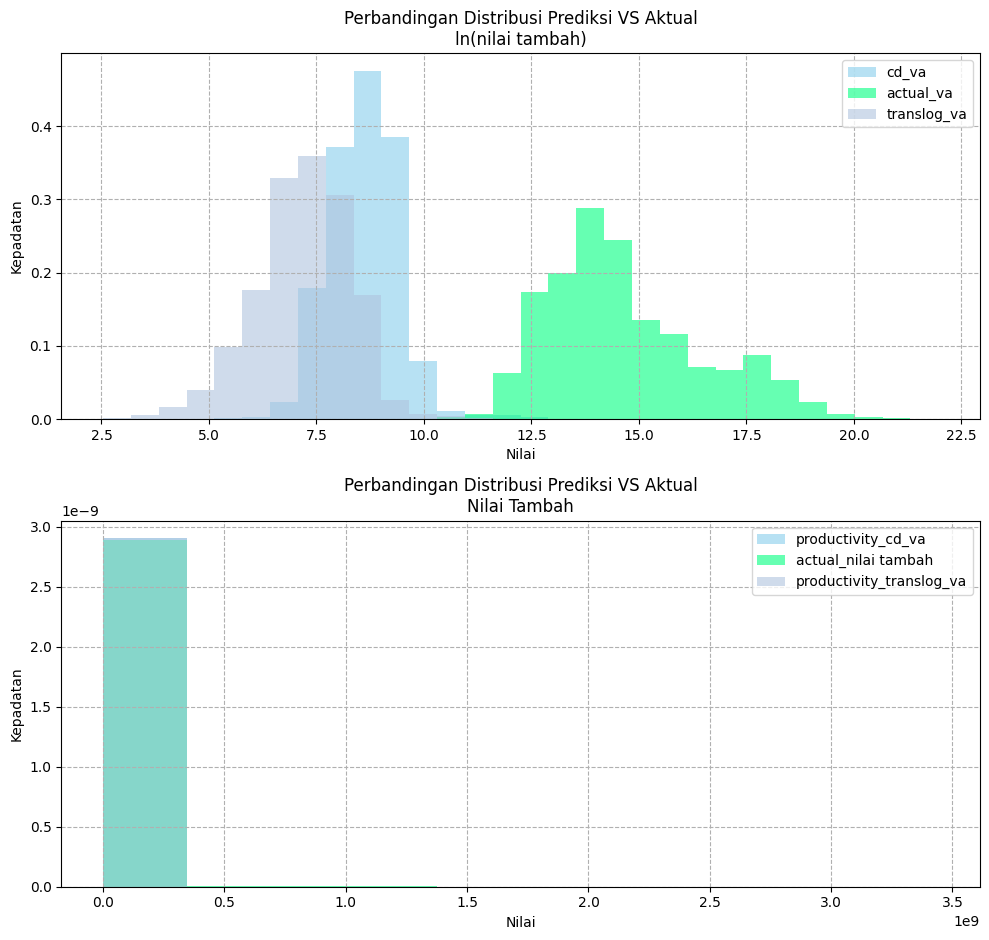

In [89]:
# Membuat data distribusi normal
# Plot histogram
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(df_f.TFPacfcd_va, bins=30, density=True, alpha=0.6, color="#87CEEB", label="cd_va", range=(min(campuran_ln_va), max(campuran_ln_va)))
plt.hist(df_f.va, bins=30, density=True, alpha=0.6, color="#00FF7F", label="actual_va", range=(min(campuran_ln_va), max(campuran_ln_va)))
plt.hist(df_f.TFPacftrans_va, bins=30, density=True, alpha=0.6, color="#B0C4DE", label="translog_va", range=(min(campuran_ln_va), max(campuran_ln_va)))
plt.title("Perbandingan Distribusi Prediksi VS Aktual\nln(nilai tambah)")
plt.xlabel("Nilai")
plt.ylabel("Kepadatan")
plt.legend()
plt.grid(True, linestyle="--")


plt.subplot(2, 1, 2)
plt.hist(df_f.TFPlvACFcd_va, density=True, alpha=0.6, range=(min(campuran_va), max(campuran_va)), color="#87CEEB", label="productivity_cd_va")
plt.hist(df_f.nilai_tambah, density=True, alpha=0.6, range=(min(campuran_va), max(campuran_va)), color="#00FF7F", label="actual_nilai tambah")
plt.hist(df_f.TFPlvACFtrans_va, density=True, alpha=0.6, range=(min(campuran_va), max(campuran_va)), color="#B0C4DE", label="productivity_translog_va")
plt.title("Perbandingan Distribusi Prediksi VS Aktual\nNilai Tambah")
plt.xlabel("Nilai")
plt.ylabel("Kepadatan")
plt.legend()
plt.grid(True, linestyle="--")

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig("distribusi_nilai_tambah.png")
plt.show()

### Evaluasi Pemodelan Terbaik

In [94]:
halo = np.array([1, 2, 4])
halo_2 = np.array([1, 1, 1])
(halo_2 - halo)^2

array([ 2, -3, -1], dtype=int32)

In [95]:
np.sqrt(4)

2.0

In [96]:
def mse_score(array_pred, array_act):
    if len(array_pred) != len(array_act):
        raise ValueError("Panjang array_pred dan array_act harus sama")
    n = len(array_pred)
    jumlah = 0
    for i in range(n):
        jumlah += (array_pred[i] - array_act[i]) ** 2
    return jumlah / n

def rmse_score(mse_score):
    return np.sqrt(mse_score)

In [104]:
# variabel target va
mse_cd_va = mse_score(df_f.va, df_f.TFPacfcd_va)
rmse_cd_va = rmse_score(mse_cd_va)
mse_translog_va = mse_score(df_f.va, df_f.TFPacftrans_va)
rmse_translog_va = rmse_score(mse_translog_va)

print(f"Score Pemodelan Cobb Douglass\nMSE: {mse_cd_va}\nRMSE: {rmse_cd_va}")
print(f"Score Pemodelan Translog\nMSE: {mse_translog_va}\nRMSE: {rmse_translog_va}")

Score Pemodelan Cobb Douglass
MSE: 39.27607722220307
RMSE: 6.267062886408838
Score Pemodelan Translog
MSE: 61.49848282611659
RMSE: 7.842096838608701


In [105]:
# variabel target y
mse_cd_y = mse_score(df_f.y, df_f.TFPacfcd_go)
rmse_cd_y = rmse_score(mse_cd_y)
mse_translog_y = mse_score(df_f.y, df_f.TFPacftrans_go)
rmse_translog_y = rmse_score(mse_translog_y)

print(f"Score Pemodelan Cobb Douglass\nMSE: {mse_cd_y}\nRMSE: {rmse_cd_y}")
print(f"Score Pemodelan Translog\nMSE: {mse_translog_y}\nRMSE: {rmse_translog_y}")

Score Pemodelan Cobb Douglass
MSE: 40.900072857245576
RMSE: 6.395316478271077
Score Pemodelan Translog
MSE: 39.40871467572027
RMSE: 6.277636073851388


In [100]:
rmse_score(mse_score(df_f.y, df_f.TFPacftrans_go))

6.277636073851388

In [101]:
rmse_score(mse_score(df_f.va, df_f.TFPacftrans_va))

7.842096838608701

In [102]:
rmse_score(mse_score(df_f.va, df_f.TFPacfcd_va))

6.267062886408838